In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class ImageProcessor:
    def __init__(self, path):
        self.img = Image.open(path).convert("RGBA")
        print(f"Imagen cargada: {path} ({self.img.size})")

    def save(self, path):
        if self.img is not None:
            self.img.save(path)
            print(f"Imagen guardada en: {path}")
        else:
            print("No hay imagen cargada para guardar.")
        return self

    def to_transparent(self, lower_rgb=(200,200,200), upper_rgb=(255,255,255)):
        if self.img is None:
            print("No hay imagen cargada para procesar transparencia.")
            return self

        data = np.array(self.img)
        r, g, b, a = data[:,:,0], data[:,:,1], data[:,:,2], data[:,:,3]

        mask = ((r >= lower_rgb[0]) & (r <= upper_rgb[0]) &
                (g >= lower_rgb[1]) & (g <= upper_rgb[1]) &
                (b >= lower_rgb[2]) & (b <= upper_rgb[2]))

        data[mask] = (0, 0, 0, 0)
        self.img = Image.fromarray(data, mode="RGBA")
        print(f"Transparentado aplicado con rango {lower_rgb} - {upper_rgb}")
        return self

    def resize(self, size, keep_aspect=False):
        if self.img is None:
            print("No hay imagen cargada para redimensionar.")
            return self

        if keep_aspect:
            ratio_w = size[0] / self.img.width
            ratio_h = size[1] / self.img.height
            ratio = min(ratio_w, ratio_h)

            new_w = int(self.img.width * ratio)
            new_h = int(self.img.height * ratio)

            resized_img = self.img.resize((new_w, new_h), Image.LANCZOS)

            canvas = Image.new("RGBA", size, (0,0,0,0))
            offset_x = (size[0] - new_w) // 2
            offset_y = (size[1] - new_h) // 2
            canvas.paste(resized_img, (offset_x, offset_y))
            self.img = canvas
            print(f"Imagen redimensionada manteniendo aspecto a canvas {size}")
        else:
            self.img = self.img.resize(size, Image.LANCZOS)
            print(f"Imagen redimensionada directamente a {size}")

        return self

    def scale(self, factor):
        if self.img is None:
            print("No hay imagen cargada para escalar.")
            return self

        new_w = int(self.img.width * factor)
        new_h = int(self.img.height * factor)
        self.img = self.img.resize((new_w, new_h), Image.LANCZOS)
        print(f"Imagen escalada por factor {factor} a ({new_w}, {new_h})")
        return self

    def show(self):
        if self.img is None:
            print("No hay imagen cargada para mostrar.")
            return self
        plt.imshow(self.img)
        plt.axis('off')
        plt.show()
        return self

    def info(self):
        if self.img is None:
            print("No hay imagen cargada para obtener información.")
            return self
        print(f"Tamaño de la imagen: {self.img.size}")

In [ ]:
processor = ImageProcessor("background.png")

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108509184 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Imagen cargada: background.png ((11136, 9744))


In [ ]:
processor.to_transparent(lower_rgb=(200,200,200), upper_rgb=(255,255,255))

Transparentado aplicado con rango (200, 200, 200) - (255, 255, 255)


In [ ]:
processor.resize((800,600), keep_aspect=True)

In [ ]:
processor.scale(0.5)

Imagen escalada por factor 0.5 a (2784, 2436)


In [ ]:
processor.info()

Tamaño de la imagen: (2784, 2436)


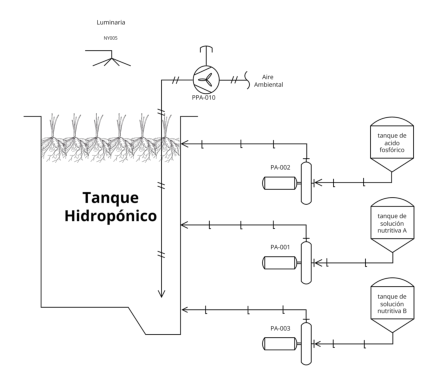

In [ ]:
processor.show()

In [ ]:
processor.save("background_res.png")

Imagen guardada en: background_res.png
